<a href="https://colab.research.google.com/github/jonghhhh/lecture_colabs/blob/main/%EC%8A%A4%ED%81%AC%EB%9E%98%ED%95%91(network%ED%99%9C%EC%9A%A9)_%EB%84%A4%EC%9D%B4%EB%B2%84%EB%89%B4%EC%8A%A4_100724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 네이버뉴스 스크래핑: network API 활용

## 검색 뉴스 결과를 network > JS 통해 찾기
- 검색 결과 창에서 스크롤다운하면 search.naver?de-- 파일이 계속 생성됨.
- 이 파일의 '응답'을 확인하면 뉴스 10개씩 담고 있음을 확인
- 이 파일의 '헤더' 부분에서 필요한 요청 url과 header 정보 확인
- 해당 url에서 html코드 가져와 \" 삭제해 clean 코드 만듬
- 필요한 정보 수집

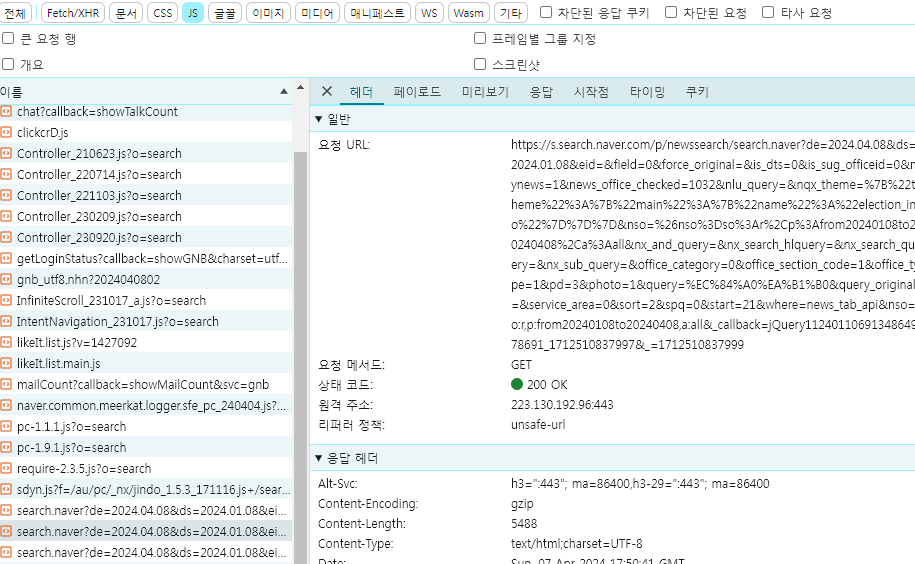

## 언론사별 naver id 확인

In [8]:
news_office={'경향신문': 1032,
 '국민일보': 1005,
 '동아일보': 1020,
 '문화일보': 1021,
 '서울신문': 1081,
 '세계일보': 1022,
 '조선일보': 1023,
 '중앙일보': 1025,
 '한겨레': 1028,
 '한국일보': 1469,
 '뉴스1': 1421,
 '뉴시스': 1003,
 '연합뉴스': 1001,
 '연합뉴스TV': 1422,
 '채널A': 1449,
 '한국경제TV': 1215,
 'JTBC': 1437,
 'KBS': 1056,
 'MBC': 1214,
 'MBN': 1019,
 'SBS': 1055,
 'SBS Biz': 1374,
 'TV조선': 1448,
 'YTN': 1052,
 '매일경제': 1009,
 '머니투데이': 1008,
 '비즈워치': 1648,
 '서울경제': 1011,
 '아시아경제': 1277,
 '이데일리': 1018,
 '조선비즈': 1366,
 '조세일보': 1123,
 '파이낸셜뉴스': 1014,
 '한국경제': 1015,
 '헤럴드경제': 1016,
 '노컷뉴스': 1079,
 '더팩트': 1629,
 '데일리안': 1119,
 '머니S': 1417,
 '미디어오늘': 1006,
 '아이뉴스24': 1031,
 '오마이뉴스': 1047,
 '프레시안': 1002,
 '디지털데일리': 1138,
 '디지털타임스': 1029,
 '블로터': 1293,
 '전자신문': 1030,
 '지디넷코리아': 1092,
 '더스쿠프': 1665,
 '레이디경향': 1145,
 '매경이코노미': 1024,
 '시사IN': 1308,
 '시사저널': 1586,
 '신동아': 1262,
 '월간 산': 1094,
 '이코노미스트': 1243,
 '주간경향': 1033,
 '주간동아': 1037,
 '주간조선': 1053,
 '중앙SUNDAY': 1353,
 '한겨레21': 1036,
 '한경비즈니스': 1050,
 '기자협회보': 1127,
 '농민신문': 1662,
 '뉴스타파': 1607,
 '동아사이언스': 1584,
 '여성신문': 1310,
 '일다': 1007,
 '코리아중앙데일리': 1640,
 '코리아헤럴드': 1044,
 '코메디닷컴': 1296,
 '헬스조선': 1346,
 '강원도민일보': 1654,
 '강원일보': 1087,
 '경기일보': 1666,
 '국제신문': 1658,
 '대구MBC': 1657,
 '대전일보': 1656,
 '매일신문': 1088,
 '부산일보': 1082,
 '전주MBC': 1659,
 'CJB청주방송': 1655,
 'JIBS': 1661,
 'kbc광주방송': 1660,
 '신화사 연합뉴스': 1348,
 'AP연합뉴스': 1077,
 'EPA연합뉴스': 1091}

## 함수 만들기

In [2]:
from urllib.parse import quote
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import pandas as pd

def navernews_selenium_scrape(query='파이썬', media='연합뉴스', date_from=20240301, date_to=20240302, sort=0, news_type=0, pages=400):
    encoded_url = quote(query, safe='')
    if media:
        media_id=news_office[media]
        target_url_base=f'https://s.search.naver.com/p/newssearch/search.naver?where=news_tab_api&service_area=0&query={encoded_url}&photo={str(news_type)}&mynews=1&office_type=1&office_section_code=1&news_office_checked={str(media_id)}&nso=so%3Ar%2Cp%3Afrom{str(date_from)}to{str(date_to)}&sort={str(sort)}&start='
    else:
        target_url_base=f'https://s.search.naver.com/p/newssearch/search.naver?where=news_tab_api&service_area=0&query={encoded_url}&photo={str(news_type)}&mynews=1&office_type=1&office_section_code=1&nso=so%3Ar%2Cp%3Afrom{str(date_from)}to{str(date_to)}&sort={str(sort)}&start='
    header = {                      # API에 담아 전송할 기본 정보
    "User-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36",
    "referer": f"https://search.naver.com/search.naver?sm=tab_hty.top&where=news&ssc=tab.news.all&query={encoded_url}&oquery={encoded_url}&tqi=im61edqVN8CssMtZCjGssssssxh-400794"
    }
    results_list=[]
    for i in tqdm(list(range(1, pages*10, 10))):
        target_url=target_url_base+str(i)
        response = requests.get(target_url, headers=header)       # 웹에 접속 요청
        soup = BeautifulSoup(response.content, 'html.parser')
        soup_str=str(soup).replace('\\"','')
        soup_clean = BeautifulSoup(soup_str, 'html.parser')
        results = soup_clean.select('div.news_area')
        # results가 비어있으면 루프 중단
        if not results:
            print(f"수집된 건수: {str(len(results_list))}")
            break
        result_lst=[]
        for result in tqdm(results):
            try: media = result.select('a.info')[0].text.replace('언론사 선정','')
            except: media=''
            try: title=result.select('a.news_tit')[0].text
            except: title=''
            try: url=result.select('a.news_tit')[0]['href']
            except: url=''
            try: url_naver=result.select('a.info')[-1]['href']
            except: url_naver=''
            try: date=result.select('span.info')[-1].text
            except:date=''
            try: text=result.select('a.api_txt_lines')[0].text
            except: text=''
            result_lst.append([media,title,date,url_naver,url,text])
        results_list.extend(result_lst)
    return results_list



## 실습

In [ ]:
query='인공지능'
media='MBN'        # media= news_office에 있는 언론사 이름
date_from=20240101
date_to=20240805
sort=2            # 0=관련도순, 1=최신순, 2=오래된순
news_type=0      # 0=전체, 1=포토, 2=동영상, 3=지면기사, 4=보도자료, 5=자동생성기사
pages=400         # 모두 몇페이지 수집할 것인지 결정. pages=5 이면 10건X5페이지로 총 50건 수집.

# 검색건수 확인이 안되므로 오래된 순으로 지정하고 여러번 검색
final_result=navernews_selenium_scrape(query=query, media=media, date_from=date_from, date_to=date_to, sort=sort, news_type=news_type, pages=pages)
final_result_df=pd.DataFrame(final_result, columns=['media','title','date','url_naver','url','text'])
final_result_df

final_result_df.to_excel('path--.xlsx')

In [ ]:
# media 지정하지 않을 때에는 매개변수에서 media=False

query='인공지능'
date_from=20240501
date_to=20240531
sort=2            # 0=관련도순, 1=최신순, 2=오래된순
news_type=0      # 0=전체, 1=포토, 2=동영상, 3=지면기사, 4=보도자료, 5=자동생성기사
pages=400         # 모두 몇페이지 수집할 것인지 결정. pages=5 이면 10건X5페이지로 총 50건 수집.

# 검색건수 확인이 안되므로 오래된 순으로 지정하고 여러번 검색
final_result=navernews_selenium_scrape(query=query, media=False, date_from=date_from, date_to=date_to, sort=sort, news_type=news_type, pages=pages)
final_result_df=pd.DataFrame(final_result, columns=['media','title','date','url_naver','url','text'])
final_result_df

final_result_df.to_excel('path--.xlsx')